In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nvidia_model import load_multi_dataset,filter_dataset,filter_dataset_2nd_pass
import cv2

Using TensorFlow backend.


In [2]:
train_dataset_folder = [#("track1_new_1/",1),
                        # ("track1_rec_1/",1),
                        # ("track1_rec_2",1),
                        # ("track1_rec_3",1),
                         ("track2_7",1,False),
                         ("track2_8",1,False),
                         ("track2_9",1,False),
                         ("track2_10",1,False),
                         ("track2_rec_5",1,True),
                         ("track2_rec_6",1,True),
                         ("track2_rec_8",1,True),
                         ("track2_rec_7",1,True),
                        ("track2_curve_1",1,False)]

In [3]:
log_df=load_multi_dataset(train_dataset_folder)

In [4]:
log_df.head()

,center,left,right,steering,throttle,brake,speed
0,./data/track2_7/IMG/center_2017_03_18_23_27_06...,./data/track2_7/IMG/left_2017_03_18_23_27_06_3...,./data/track2_7/IMG/right_2017_03_18_23_27_06_...,0.024348,0.0,0.0,9.256546
1,./data/track2_7/IMG/center_2017_03_18_23_27_06...,./data/track2_7/IMG/left_2017_03_18_23_27_06_4...,./data/track2_7/IMG/right_2017_03_18_23_27_06_...,0.059445,0.0,0.0,9.180988
2,./data/track2_7/IMG/center_2017_03_18_23_27_06...,./data/track2_7/IMG/left_2017_03_18_23_27_06_4...,./data/track2_7/IMG/right_2017_03_18_23_27_06_...,0.170260,0.0,0.0,9.099996
3,./data/track2_7/IMG/center_2017_03_18_23_27_06...,./data/track2_7/IMG/left_2017_03_18_23_27_06_5...,./data/track2_7/IMG/right_2017_03_18_23_27_06_...,0.274436,0.0,0.0,9.013496
4,./data/track2_7/IMG/center_2017_03_18_23_27_06...,./data/track2_7/IMG/left_2017_03_18_23_27_06_6...,./data/track2_7/IMG/right_2017_03_18_23_27_06_...,0.307331,0.0,0.0,8.931124


In [5]:
log_df.shape

(24407, 7)

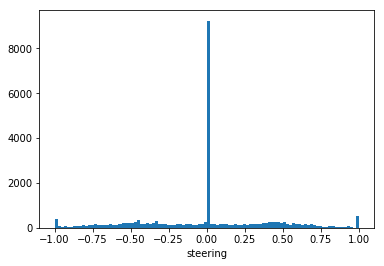

In [6]:
plt.hist(log_df['steering'],bins=100)
plt.xlabel("steering")
plt.savefig("")
plt.show()

## Histograms after filtering

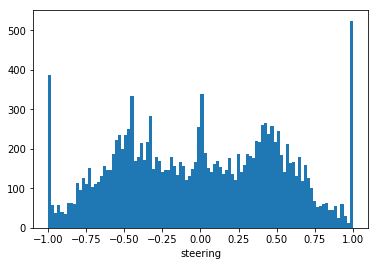

In [7]:
filtered_log_df=filter_dataset(log_df,portion=100)
plt.hist(filtered_log_df["steering"],bins=100)
plt.xlabel("steering")
plt.savefig("./data_figs/hist_1st_pass.png")
plt.show()

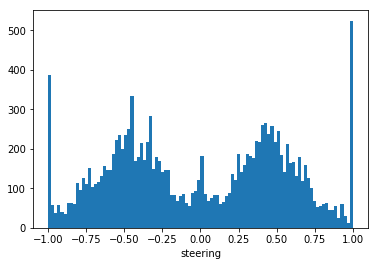

In [8]:
n_filtered_log_df=filter_dataset_2nd_pass(filtered_log_df,portion=2)
plt.hist(n_filtered_log_df["steering"],bins=100)
plt.xlabel("steering")
plt.savefig("./data_figs/hist_2nd_pass.png")
plt.show()

In [13]:
n_filtered_log_df.shape[0]

20614

In [14]:
train_dataset_folder = ["official_baseline/","trip1_off_recover",
                        "track2_7",
                        "track2_rec_1","track2_rec_2","track2_rec_3"]

In [11]:
log_df=load_multi_dataset(train_dataset_folder)

FileNotFoundError: File b'./data/o/driving_log.csv' does not exist

In [ ]:
plt.hist(log_df["steering"],bins=100)
plt.show()

In [ ]:
f_log_df=filter_dataset(log_df)
print(f_log_df.shape[0])

In [ ]:
plt.hist(f_log_df["steering"],bins=100)
plt.show()

In [ ]:
## Show a couple of images

In [ ]:
import cv2
import os
img_dir='./sample behavioral cloning data/'

rand_idx=np.random.randint(log_df.shape[0])

c_file=log_df.iloc[rand_idx,:]['center']
print(c_file)
img=cv2.imread(os.path.join(img_dir,c_file))
plt.imshow(img)

print(img.shape)
print("The dimension of images:%s,%s, %s"%img.shape)

### Resize the image

In [ ]:
import tensorflow as tf

In [ ]:
p_ch, p_row, p_col = 3, 224, 224
#p_ch, p_row, p_col = 3, 160, 320
img_placeholder = tf.placeholder("uint8", (None, 160, 320, 3))
single_img_placeholder=tf.placeholder("uint8",(160,320,3))
resize_op = tf.image.resize_image_with_crop_or_pad(single_img_placeholder, p_row, p_col)

In [ ]:
sample_image_file='./sample behavioral cloning data/IMG/center_2016_12_01_13_30_48_287.jpg'
img=np.zeros((1,160,320,3))
temp_img=cv2.imread(sample_image_file)
img[0]=temp_img
plt.imshow(temp_img)
img=img.astype('uint8')

In [ ]:
plt.imshow(img[0])

In [ ]:
with tf.Session() as sess:
    resized_img=sess.run(resize_op,feed_dict={img_placeholder:img})
    plt.imshow(resized_img[0])

In [ ]:
with tf.Session() as sess:
    resized_img=sess.run(resize_op,feed_dict={single_img_placeholder:temp_img})
    plt.imshow(resized_img)

### Resize the image and keep the ratio

In [ ]:
p_ch, p_row, p_col = 3, 80, 160
img_placeholder = tf.placeholder("uint8", (None, 160, 320, 3))
resize_op = tf.image.resize_images(img_placeholder, (p_row, p_col), method=0)

In [ ]:
with tf.Session() as sess:
    resized_img=sess.run(resize_op,feed_dict={img_placeholder:img})

In [ ]:
plt.imshow(resized_img[0].astype('uint8'))